<a href="https://colab.research.google.com/github/RoniHernandez99/AeroAplicacion/blob/master/FSC_conversionAnalogicoDigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converción analogico a digital, programado por: **David Roni Hernández Beltrán**

## **Teoria**

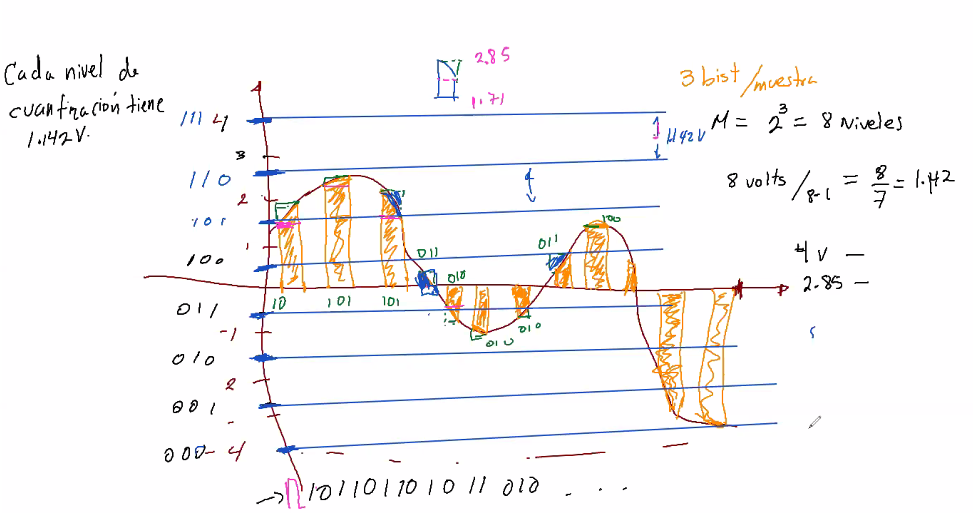

#**Codigo fuente:**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def dameElPunto(datos,funcion):
  noPos=[]
  noNeg=[]
  for numero in datos:
    if numero<0: noNeg.append(numero)
    elif numero>0: noPos.append(numero)
  if len(noPos)>=len(noNeg):
    return funcion(noPos)
  else:
    return -1*funcion( [-x for x in noNeg] )



def discretizar(x_senal,y_senal,muestras,filtro):
  fig, ax = plt.subplots()

  if filtro==0:
    f_aplicar=lambda x : min(x)
  else:
    f_aplicar=lambda x : max(x)

  cada=len(x_senal)// (muestras*2)
  c=0
  x_d=[]
  y_d=[]
  datos=[]
  
  largo=(x_senal[1]-x_senal[0])*cada 
  tocaGraficar=True

  n=0
  for x,y in zip(x_senal,y_senal):
    c+=1
    n+=1
    if c%cada==0:
      final=x
      if tocaGraficar:
        y=dameElPunto(datos,f_aplicar)
        
        x_d.append(final-largo)
        y_d.append(y)

        #Rectangle((x,y),ancho,alto)
        ax.add_patch(Rectangle((final-largo,0),
                          largo,y,
                          #edgecolor = 'red',
                          facecolor = '#8DF2EC',
                          fill=True
                          #lw=5
                        )
                )
        tocaGraficar=False
      else: tocaGraficar=True
      datos=[]
    datos.append(y)
  #add rectangle to plot
  grafica=plt.plot(x_senal,y_senal)
  plt.plot(x_d,y_d,'o')
  plt.show()

  return np.array(x_d),np.array(y_d)

In [10]:
import pandas as pd

def datosA_Binario(datos,rangosVoltaje=(0,5),bitsResol=5):
  datos_copy=datos.copy()

  #Si hay datos que exeden tenemos que recortarlos
  for n,x in enumerate(datos_copy):
    if x<rangosVoltaje[0]:
      datos_copy[n]=rangosVoltaje[0]

    elif x>rangosVoltaje[1]:
      datos_copy[n]=rangosVoltaje[1]


  repreMax=(2** (bitsResol) )-1 #representacion Maxima en decimal con 'bitsResol'  de resolucion
  difPot=abs(  rangosVoltaje[1] - rangosVoltaje[0] ) # diferencia de potencial
  resolVoltaje=difPot/repreMax #el voltaje mas pequeño que puede representar nuestro sistema

  #SE SUPONE QUE...
  # Podemos construir 'repreMax' de 'resolVoltaje' en 'resolVoltaje' inciando desde el 
  # 'rangosVoltaje(0)' hasta llegar al 'rangosVoltaje(1)'

  if rangosVoltaje[0]!=0: #si el limite inferior de nuestro rango es negativo...
  #lo moveremos para que estre en  un intervalo de [0,x]
    datos_copy=datos_copy+ ( -1*rangosVoltaje[0] ) 
    #si el voltaje minimo a representar es negativo se sumara ese 
    #valor a todos los datos para que esten en ese rango
    #en caso contrario se restara es numero para que este en ese rango

  datos_copy=datos_copy/resolVoltaje 
  #x<0.5 entonces x=0
  #x>0.5 entonces x=1
  datos_copy=np.around(datos_copy, decimals=0)
  datos_bits=datos_copy.astype(int) #representacion de los datos en bits
  datos_copy= datos_copy*resolVoltaje 
 
  if rangosVoltaje[0]!=0: 
    datos_copy=datos_copy + rangosVoltaje[0]  
 
  #datosBin=np.binary_repr(datos_bits, width=bitsResol+1)
  return resolVoltaje,datos_bits,datos_copy
  

In [11]:
def analisis_Roni(x_senal,y_senal,muestras,filtro,rangosVoltaje,bitsResol):
    x,y=discretizar(x_senal,y_senal,muestras,filtro)
    
    datos=y
    rangosVoltaje=rangosVoltaje
    bitsResol=bitsResol

    resolucion,datos_binDec,datos_vol=datosA_Binario(datos,rangosVoltaje,bitsResol)

    print("Rango voltaje: {} a {} [V]".format( rangosVoltaje[0],rangosVoltaje[1] ) )
    print("Bist de resolucion: {} [bits]".format(bitsResol))
    print("Resolucion voltaje: {} [V]".format(resolucion) )

    datosBinario=np.vectorize(np.binary_repr)(datos_binDec,bitsResol)
    dict = {'Voltaje' : datos, 
            'Bin':datosBinario,
            'Bin DEC':datos_binDec,
            'Voltaje reducido':datos_vol
            } 
    df = pd.DataFrame(dict)

    #Graficando la señal como un escalon...
    xx=[]
    yy=[]
    for n in  range(len(datos_vol)):
      x_now=x[n]
      y_now=datos_vol[n]
    
      xx.append(x_now)
      yy.append(y_now)
      
      try:
        x_now=x[n+1]
      except:
        break
      xx.append(x_now)
      yy.append(y_now)

    xx=np.array(xx)
    yy=np.array(yy)

    plt.figure()
    plt.title("Senal digital")
    plt.plot(xx,yy)
    plt.plot(x,datos_vol,'o')

    plt.figure()
    plt.title("Senal original")
    plt.plot(x_senal,y_senal)
    

    
    
    plt.figure()
    plt.title("Comparacion")
    plt.plot(xx,yy,label="Senal digital")  
    plt.plot(x_senal,y_senal,label="Senal analogica")
    plt.legend()

    #plt.plot()

    #plt.figure()
    #plt.plot(x,y,label="Senal discreta")
    #plt.plot()

    #plt.figure()
    #plt.plot(x,datos_vol)
    #plt.plot(x,datos_vol,'o')
    #plt.plot()
    print(df)

# **Ejemplo 1:**

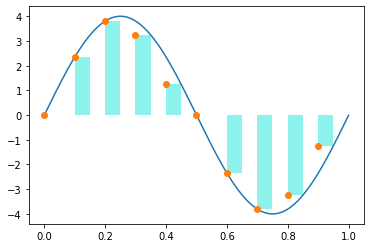

Rango voltaje: -5 a 5 [V]
Bist de resolucion: 10 [bits]
Resolucion voltaje: 0.009775171065493646 [V]
    Voltaje         Bin  Bin DEC  Voltaje reducido
0  0.012566  1000000001      513          0.014663
1  2.340963  1011101111      751          2.341153
2  3.800324  1110000100      900          3.797654
3  3.250777  1101001100      844          3.250244
4  1.259946  1010000000      640          1.256109
5 -0.012566  0111111110      510         -0.014663
6 -2.340963  0100010000      272         -2.341153
7 -3.800324  0001111011      123         -3.797654
8 -3.250777  0010110011      179         -3.250244
9 -1.259946  0101111111      383         -1.256109


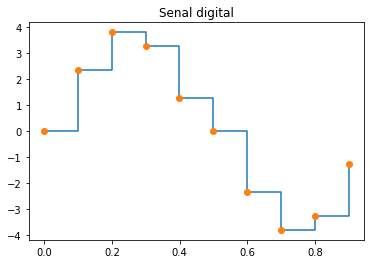

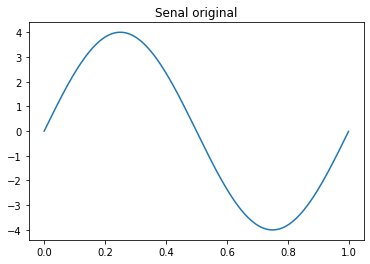

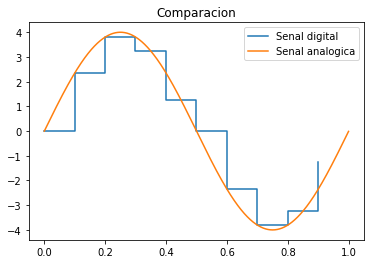

In [13]:
t=np.arange(0,1,0.0005)
f=1
senal=4*np.sin(2*np.pi*t*f)
noMuestras=10 #10 muestras por segundo
noMuestras*=f #la multiplicamos por la frecuencia 


#analisis_Roni(x_senal,y_senal,muestras,filtro,rangosVoltaje,bitsResol)

analisis_Roni(t,senal,noMuestras,0,(-5,5),10)


# **Ejemplo 2**

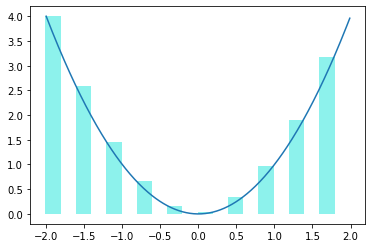

Rango voltaje: 0 a 4 [V]
Bist de resolucion: 3 [bits]
Resolucion voltaje: 0.5714285714285714 [V]
   Voltaje  Bin  Bin DEC  Voltaje reducido
0   4.0000  111        7          4.000000
1   2.5921  101        5          2.857143
2   1.4641  011        3          1.714286
3   0.6561  001        1          0.571429
4   0.1681  000        0          0.000000
5   0.0324  000        0          0.000000
6   0.3364  001        1          0.571429
7   0.9604  010        2          1.142857
8   1.9044  011        3          1.714286
9   3.1684  110        6          3.428571


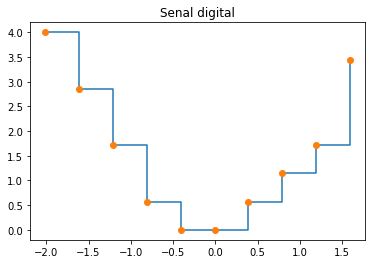

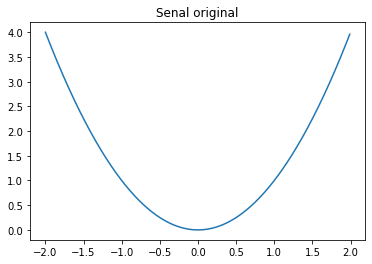

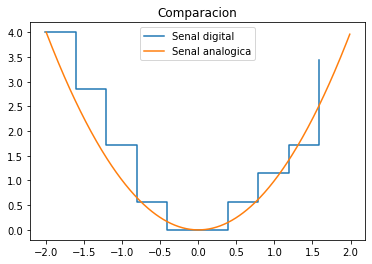

In [ ]:
x=np.arange(-2,2,0.01)
y=x**2
noMuestras=10

#analisis_Roni(x_senal,y_senal,muestras,filtro,rangosVoltaje,bitsResol)
analisis_Roni(x,y,noMuestras,1,(0,4),3)


# **Ejemplo 3**

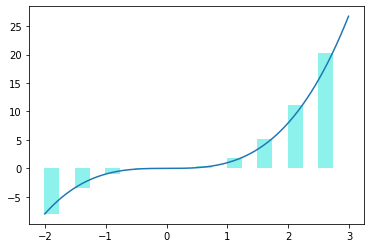

Rango voltaje: -10 a 10 [V]
Bist de resolucion: 3 [bits]
Resolucion voltaje: 2.857142857142857 [V]
     Voltaje  Bin  Bin DEC  Voltaje reducido
0  -8.000000  001        1         -7.142857
1  -3.442951  010        2         -4.285714
2  -1.030301  011        3         -1.428571
3  -0.132651  011        3         -1.428571
4   0.012167  100        4          1.428571
5   0.389017  100        4          1.428571
6   1.860867  100        4          1.428571
7   5.177717  101        5          4.285714
8  11.089567  111        7         10.000000
9  20.346417  111        7         10.000000


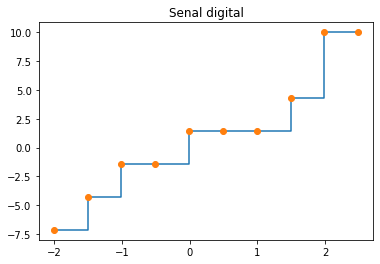

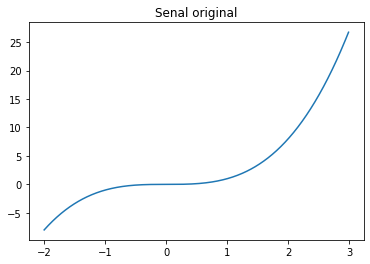

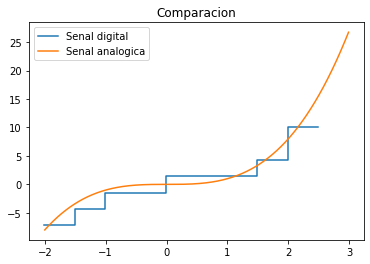

In [ ]:
x=np.arange(-2,3,0.01)
y= x**3
noMuestras=10

#analisis_Roni(x_senal,y_senal,muestras,filtro,rangosVoltaje,bitsResol)
analisis_Roni(x,y,noMuestras,1,(-10,10),3)